In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from bcc.utils import plot_well_type_positions

 captum (see https://github.com/pytorch/captum).
INFO:lightning_fabric.utilities.seed:Global seed set to 0


## Overview of the JUMP Plate Layout

The data contains the sentinel plates (TARGET2) and the positive and negative controls from the production plates (COMPOUND). There are 8 different positive controls and DMSO is used as negative control.

All 4762 features were loaded.

The data stems from the principal data set (cpg0016) which uses human U2OS osteosarcoma cells

In [2]:
data_file = "../../data/jump/jump_raw.h5ad"
if not os.path.exists(data_file):
    raise FileNotFoundError("Please create the anndata object by running data/jump/download_jump.py")

In [3]:
adata = sc.read_h5ad(data_file)
print(adata)
adata.obs.head()

/home/stockhaus/miniconda3/envs/mp/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 215995 × 4762
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'well_type', 'Metadata_Microscope_Name', 'Metadata_Widefield_vs_Confocal', 'Metadata_Excitation_Type', 'Metadata_Objective_NA', 'Metadata_N_Brightfield_Planes_Min', 'Metadata_N_Brightfield_Planes_Max', 'Metadata_Distance_Between_Z_Microns', 'Metadata_Sites_Per_Well', 'Metadata_Filter_Configuration', 'Metadata_Excitation_Low_DNA', 'Metadata_Excitation_Low_ER', 'Metadata_Excitation_Low_RNA', 'Metadata_Excitation_Low_AGP', 'Metadata_Excitation_Low_Mito', 'Metadata_Excitation_High_DNA', 'Metadata_Excitation_High_ER', 'Metadata_Excitation_High_RNA', 'Metadata_Excitation_High_AGP', 'Metadata_Excitation_High_Mito', 'Metadata_Emission_Low_DNA', 'Metadata_Emission_Low_ER', 'Metadata_Emission_Low_RNA', 'Metadata_Emission_Low_AGP', 'Metadata_Emission_Low_Mito', 'Metadata_Emission_High_DNA', 'Metadata_Emis

,Metadata_JCP2022,Metadata_InChIKey,Metadata_InChI,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_PlateType,well_type,Metadata_Microscope_Name,Metadata_Widefield_vs_Confocal,...,Metadata_Emission_High_Mito,Metadata_FPBase_Config,broad_sample,InChIKey,pert_iname,pubchem_cid,target,pert_type,control_type,smiles
0,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210726-160150,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210727-153003,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210803-153958,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210809-134534,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JCP2022_000794,AECDBHGVIIRMOI-UHFFFAOYSA-N,InChI=1S/C27H29N5O/c28-26-25-24(21-8-4-9-23(14...,source_10,Dest210810-173723,G21,TARGET2,treatment,CV8000,Confocal,...,690.5,http://broad.io/JUMPProductionConfigCV8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
temp = adata.obs[(adata.obs.well_type=="poscon") & (adata.obs.Metadata_PlateType=="TARGET2")].groupby("Metadata_Plate", observed=True)["Metadata_JCP2022"].nunique().values
all(temp == 8)

True

This shows that all of the 8 positive controls are on each of the sentinel plates

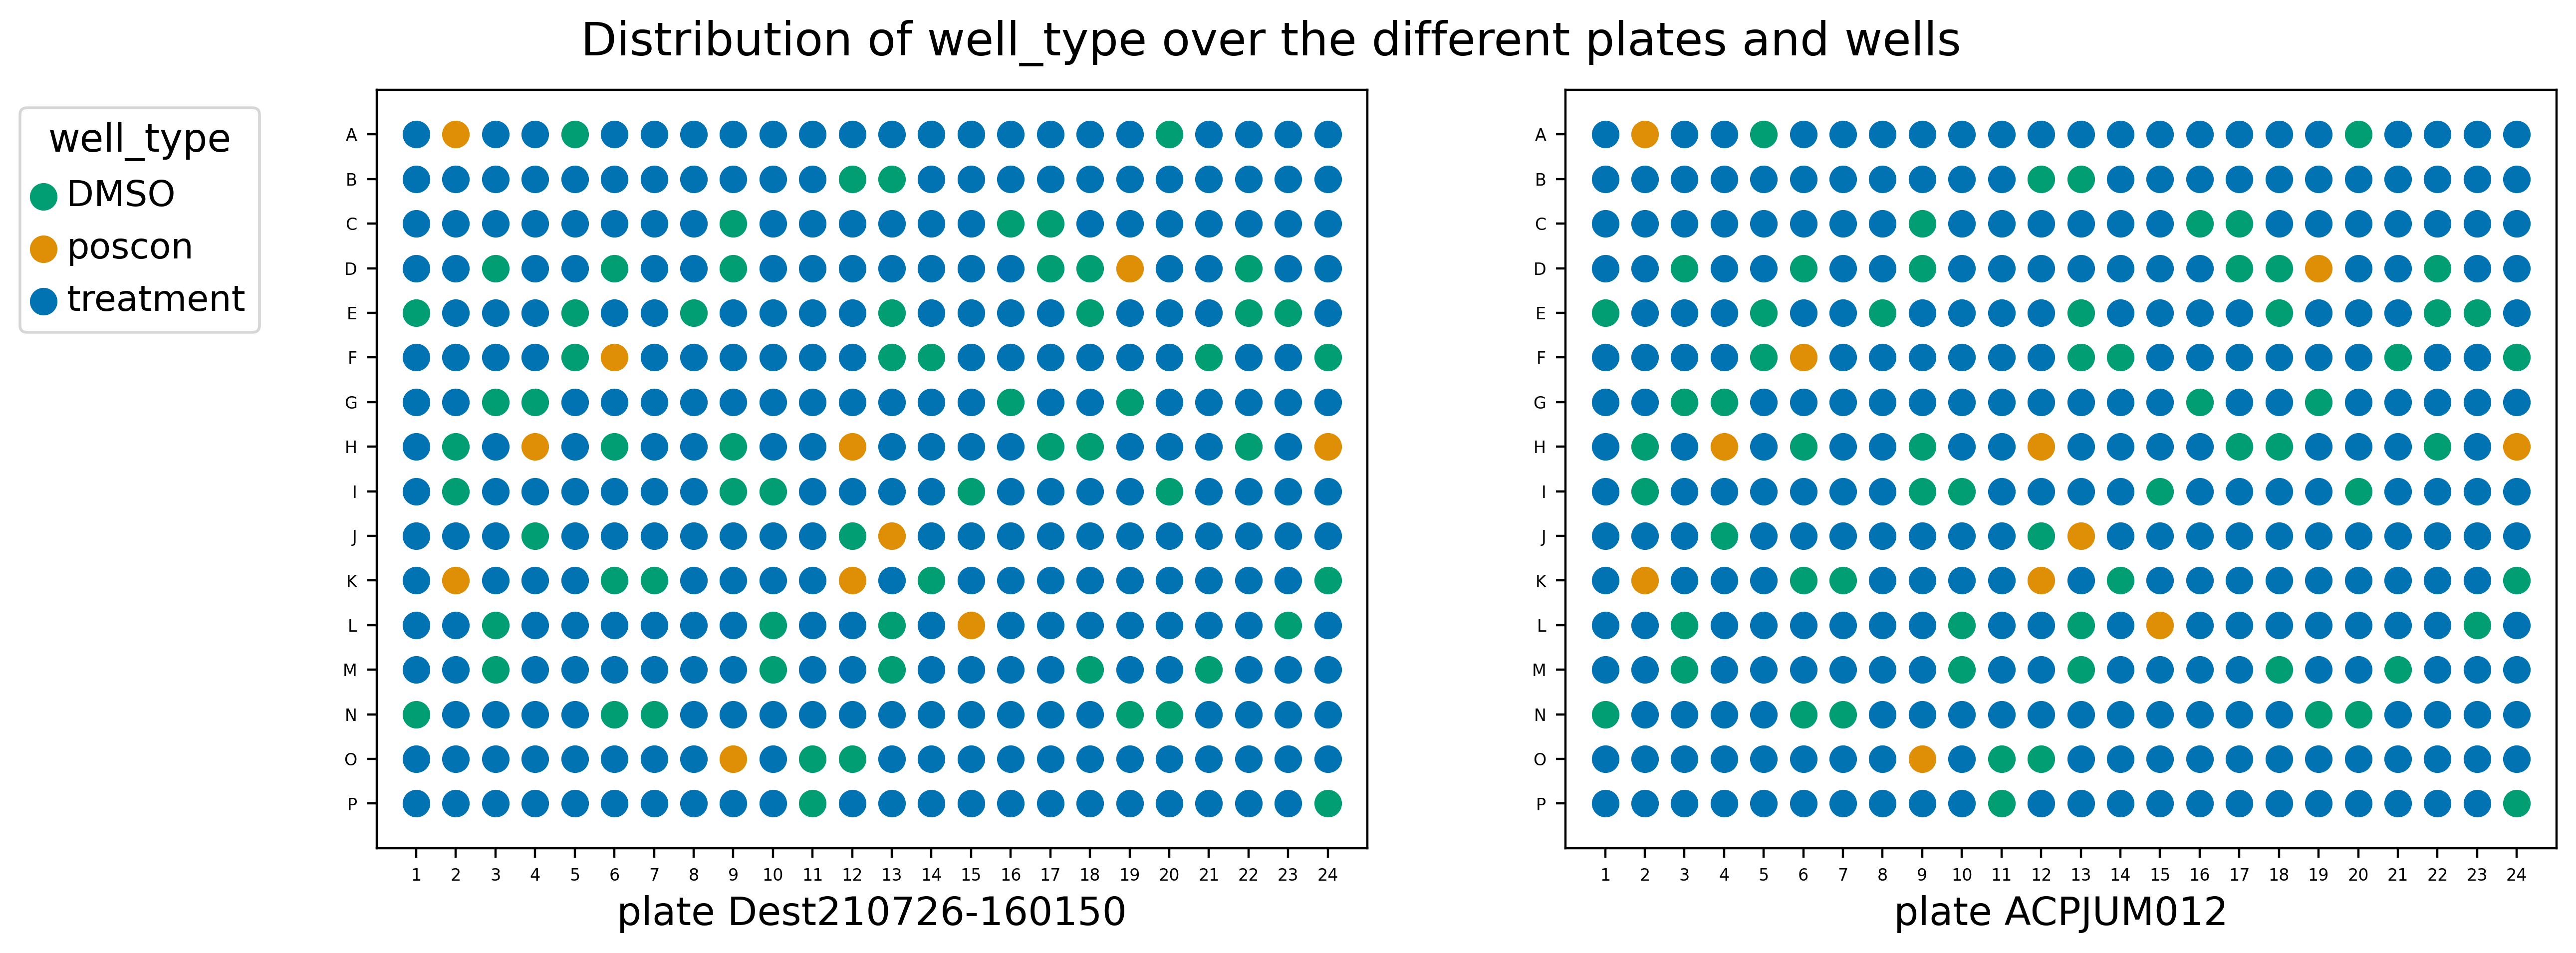

In [7]:
f = plot_well_type_positions(adata.obs[(adata.obs.Metadata_Plate=="ACPJUM012") | (adata.obs.Metadata_Plate=="Dest210726-160150")], "Metadata_Well", "well_type", "Metadata_Plate", 16, 24)

We see that DMSO and poscon samples are in the same plate locations (at least for those 2 sentinel plates which stem from different sources)

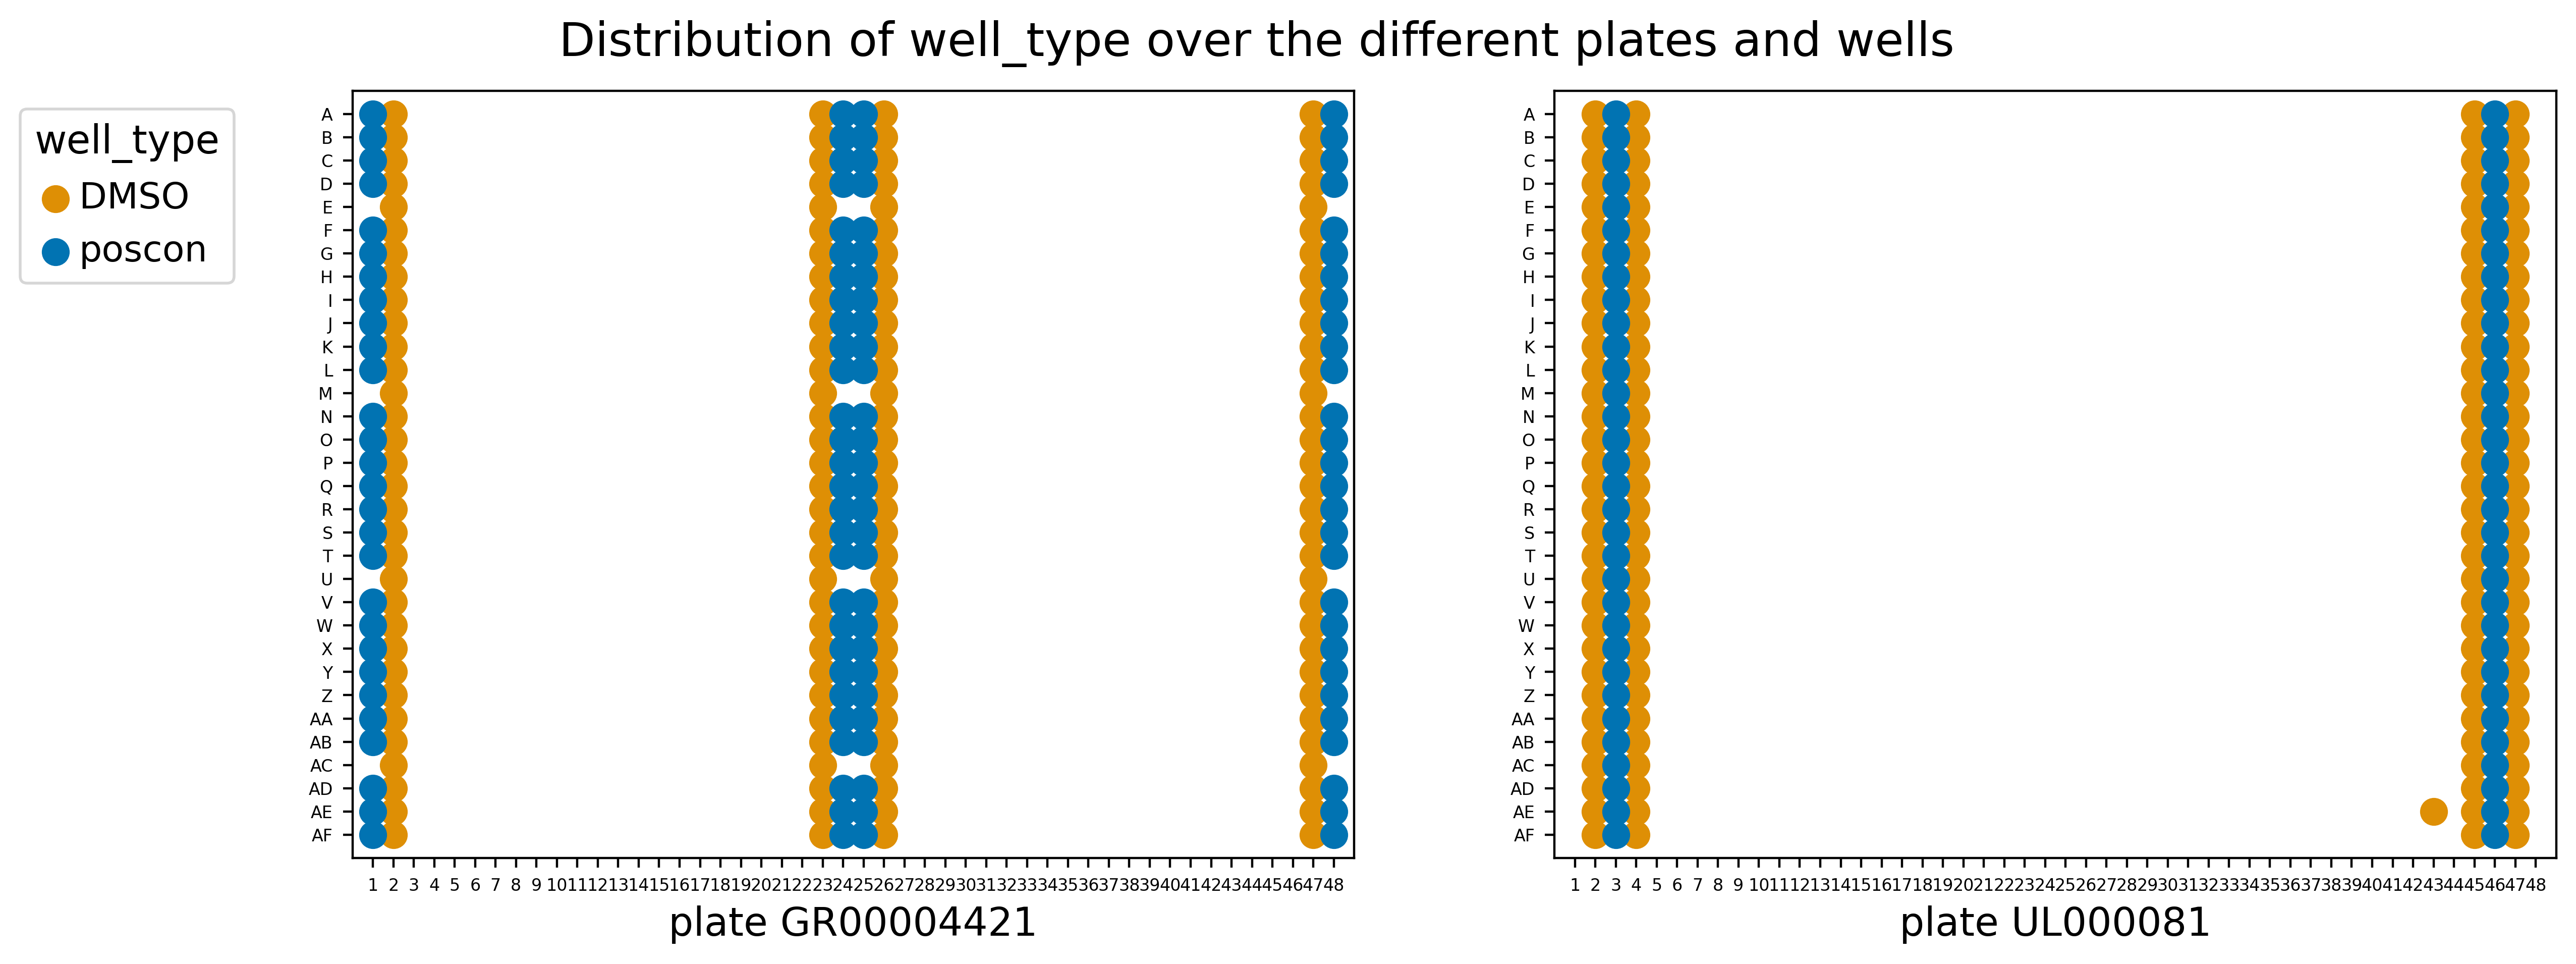

In [8]:
f = plot_well_type_positions(adata.obs[(adata.obs.Metadata_Plate=="UL000081") | (adata.obs.Metadata_Plate=="GR00004421")], "Metadata_Well", "well_type", "Metadata_Plate", 32, 48)

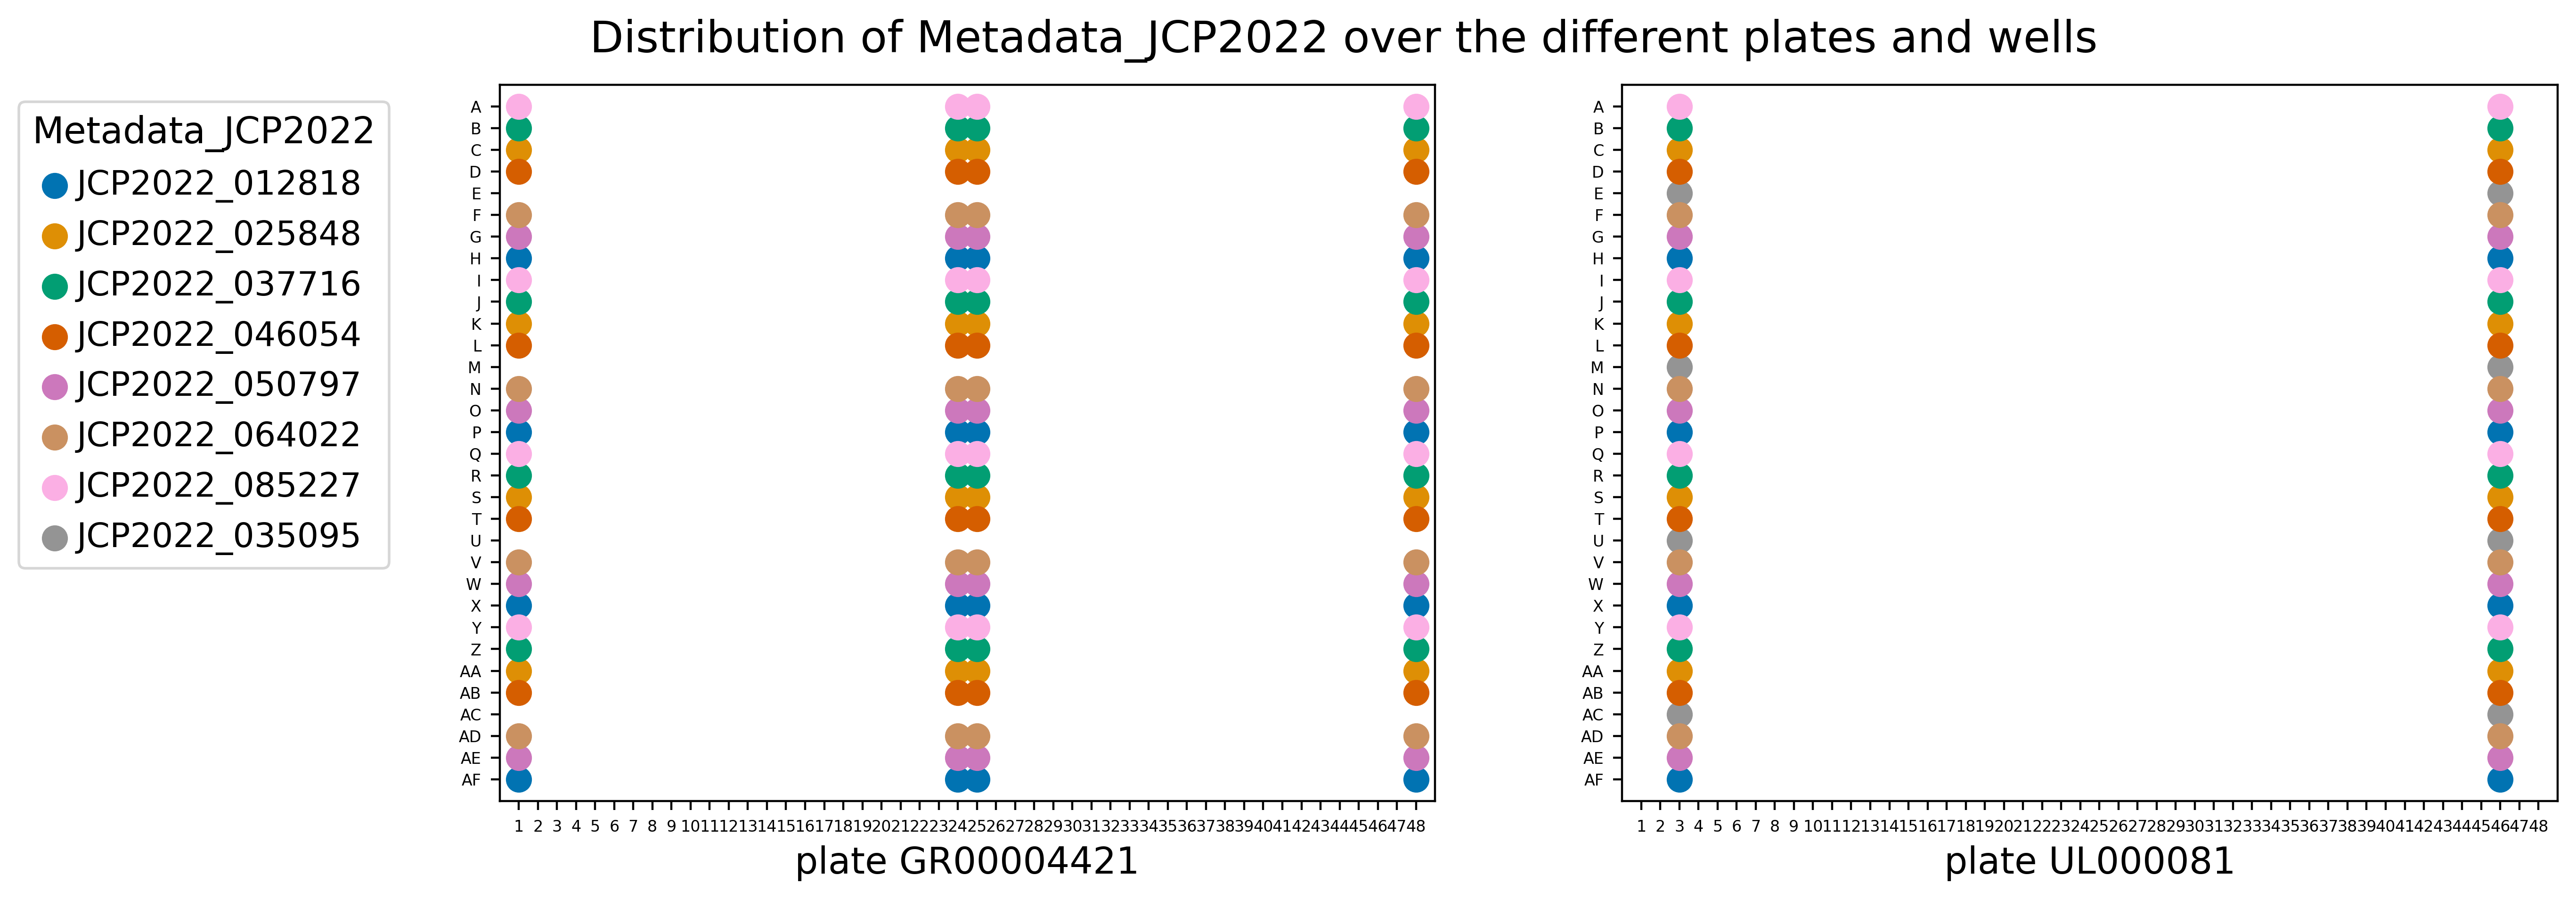

In [4]:
f = plot_well_type_positions(adata.obs[((adata.obs.Metadata_Plate=="UL000081") & (adata.obs.well_type=="poscon")) |
((adata.obs.Metadata_Plate=="GR00004421") & (adata.obs.well_type=="poscon"))], "Metadata_Well", "Metadata_JCP2022", "Metadata_Plate", 32, 48)

We see that not all production plates use the same layout. Sometimes, not all poscons are included.